In [2]:
import scipy.io as sio
from pyleoclim import Spectral

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv("/home/sysop/Documents/KurtWogau/2500yrData2.csv")

In [7]:
data.head()

,Yr BP,Sr/Fe,Ti
0,1999.97,0.410811,617
1,1999.78,0.374046,662
2,1999.59,0.336861,618
3,1999.41,0.409222,608
4,1999.22,0.384615,635


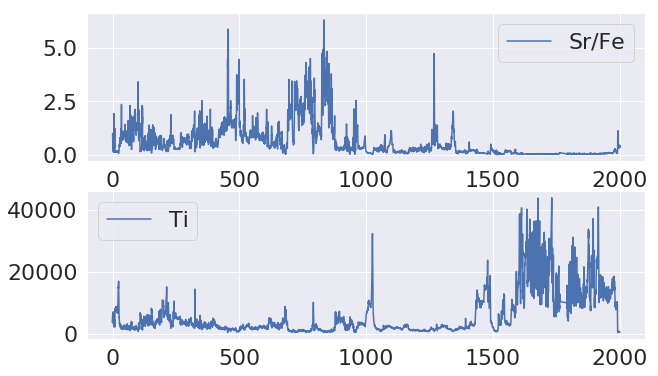

In [8]:
#data = pd.read_csv("2500yrData2.csv")
x1 = data['Sr/Fe'].values
y1 = data['Ti'].values
t = data['Yr BP'].values

sns.set(style="darkgrid", font_scale=2)
fig = plt.figure(figsize=[10, 6])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t, x1, label='Sr/Fe')
ax1.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(t, y1, label='Ti')
ax2.legend()

In [12]:
data['Yr BP'].values

array([1.99997e+03, 1.99978e+03, 1.99959e+03, ..., 3.20000e-01,
       1.80000e-01, 4.00000e-02])

In [9]:
tau = np.linspace(np.min(t), np.max(t), np.size(t))
s0 = 2*np.median(np.diff(t))
nv = 12
a0 = 2**(1/nv)
noct = np.floor(np.log2(np.size(t)))-1
scale = s0*a0**(np.arange(noct*nv+1))
freqs = 1/scale[::-1]
res_xwc = Spectral.xwc(
    x1, t, y1, t, tau=tau, nMC=0, freqs=freqs
)

/home/sysop/anaconda3/lib/python3.6/site-packages/pyleoclim/Spectral.py:2186: UserWarning: The f2py version is not supported for Linux right now; will use python version instead.
  warnings.warn("The f2py version is not supported for Linux right now; will use python version instead.")
/home/sysop/anaconda3/lib/python3.6/site-packages/pyleoclim/Spectral.py:846: RuntimeWarning: invalid value encountered in double_scalars
  Neff_loc = sum_w**2 / np.sum(weights**2)
/home/sysop/anaconda3/lib/python3.6/site-packages/pyleoclim/Spectral.py:846: RuntimeWarning: invalid value encountered in double_scalars
  Neff_loc = sum_w**2 / np.sum(weights**2)
/home/sysop/anaconda3/lib/python3.6/site-packages/pyleoclim/Spectral.py:1588: RuntimeWarning: invalid value encountered in sqrt
  wcs = S12 / (np.sqrt(S1)*np.sqrt(S2))


In [20]:
res_xwc

Results(xw_coherence=array([[0.55897434, 0.47834574, 0.39920833, ...,        nan,        nan,
               nan],
       [0.55890857, 0.47828175, 0.39915054, ...,        nan,        nan,
               nan],
       [0.55884281, 0.47821776, 0.39909275, ...,        nan,        nan,
               nan],
       ...,
       [0.59386133, 0.51178142, 0.42909298, ...,        nan,        nan,
               nan],
       [0.59380178, 0.51172556, 0.42904409, ...,        nan,        nan,
               nan],
       [0.59374221, 0.51166966, 0.42899516, ...,        nan,        nan,
               nan]]), xw_amplitude=array([[4.91323600e-02, 3.47814989e-02, 1.87742573e-02, ...,
        6.15045158e-03, 6.05682916e-03, 6.38022636e-03],
       [4.91447049e-02, 3.47930839e-02, 1.87823171e-02, ...,
        1.40019250e-03, 1.62712889e-03, 2.41377158e-03],
       [4.91570553e-02, 3.48046765e-02, 1.87903859e-02, ...,
        3.01857704e-04, 5.51451545e-04, 9.55944102e-04],
       ...,
       [1.63756212e-01

/home/sysop/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/home/sysop/anaconda3/lib/python3.6/site-packages/pyleoclim/Spectral.py:2480: RuntimeWarning: invalid value encountered in less
  phase[xw_coherence < pt] = np.nan


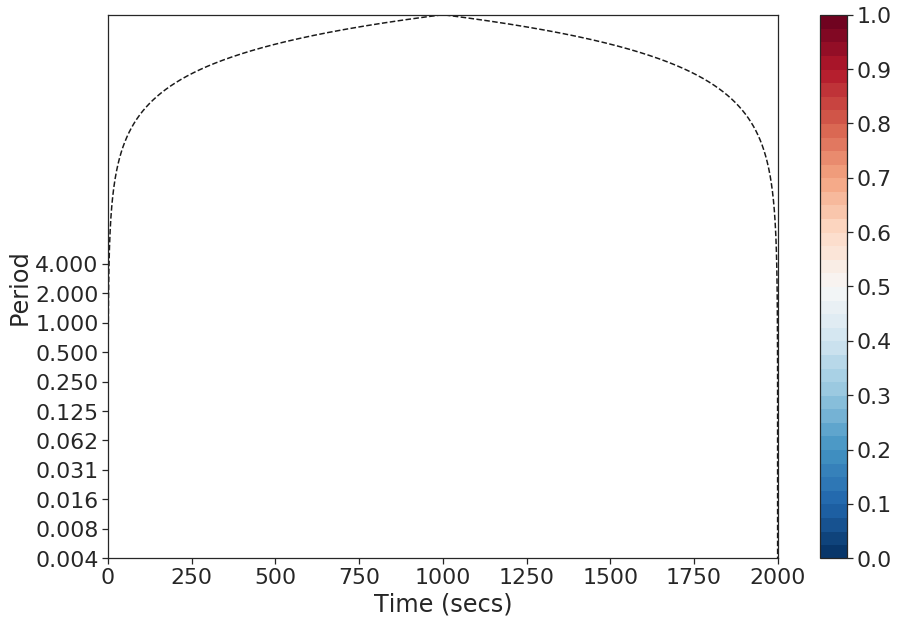

In [10]:
period_ticks = [1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
ax = Spectral.plot_coherence(res_xwc, figsize=[15, 10],
                             levels=np.linspace(0, 1., 41),
                             tick_range=np.linspace(0, 1., 11),
                             clr_map='RdBu_r',
                             yticks=period_ticks,
                             ylim=[np.min(period_ticks), np.max(res_xwc.coi)],
                             xlabel='Time (secs)',
                             plot_cone=True,
                             plot_signif=False,
                             # adjust arrows
                             skip_x=100,
                             skip_y=6,
                             scale=35,
                             width=0.004
                            )